### Library import

In [2]:
import pandas as pd
import numpy as np

### Load Data

In [3]:
data_original = pd.read_csv('musiccaps-public.csv', index_col='ytid')
data_original.head()

,start_s,end_s,audioset_positive_labels,aspect_list,caption,author_id,is_balanced_subset,is_audioset_eval
ytid,,,,,,,,
-0Gj8-vB1q4,30,40,"/m/0140xf,/m/02cjck,/m/04rlf","['low quality', 'sustained strings melody', 's...",The low quality recording features a ballad so...,4,False,True
-0SdAVK79lg,30,40,"/m/0155w,/m/01lyv,/m/0342h,/m/042v_gx,/m/04rlf...","['guitar song', 'piano backing', 'simple percu...",This song features an electric guitar as the m...,0,False,False
-0vPFx-wRRI,30,40,"/m/025_jnm,/m/04rlf","['amateur recording', 'finger snipping', 'male...",a male voice is singing a melody with changing...,6,False,True
-0xzrMun0Rs,30,40,"/m/01g90h,/m/04rlf","['backing track', 'jazzy', 'digital drums', 'p...",This song contains digital drums playing a sim...,6,False,True
-1LrH01Ei1w,30,40,"/m/02p0sh1,/m/04rlf","['rubab instrument', 'repetitive melody on dif...",This song features a rubber instrument being p...,0,False,False


### Drop unnecessary columns
- Value in *audioset_positive_labels* is a list of labels that come from another dataset, but it doesn't seem meaningful in this dataset, so I drop this column.
- *aspect_list* is how annotators use characteristics to describe the music, and *caption* is annotator's feeling of the music, so I drop these two columns as well.

In [4]:
data = data_original.drop(['audioset_positive_labels','aspect_list','caption'],axis=1)
data.head()

,start_s,end_s,author_id,is_balanced_subset,is_audioset_eval
ytid,,,,,
-0Gj8-vB1q4,30,40,4,False,True
-0SdAVK79lg,30,40,0,False,False
-0vPFx-wRRI,30,40,6,False,True
-0xzrMun0Rs,30,40,6,False,True
-1LrH01Ei1w,30,40,0,False,False


### Drop duplicated instances
Above I remove columns about how annotators describe the music. But there may have different annotators comment on same music, so I need to drop duplicated music instances. 

And here I find out that there are total 4647 duplicated music instances then I drop them, and the number of instances left is 874.

In [5]:
print('Number of instances = %d' % (data.shape[0]))
dups = data.duplicated()
print('Number of duplicated instances = %d' % (dups.sum()))
data = data.drop_duplicates()
print('Number of instances after dropping duplicates = %d' % (data.shape[0]))

Number of instances = 5521
Number of duplicated instances = 4647
Number of instances after dropping duplicates = 874


### Aggregation of `start_s` and `end_s`
Orignally I want to get the interval of each music in the dataset to make a new aggregation. But after I use `unique()`, it turns out that every interval of each sample is the same. So I give up this idea.

In [6]:
start_s = data['start_s']
end_s = data['end_s']
interval = end_s - start_s
print(interval.unique())

[10]


### Discretize `start_s`
I use `KBinsDiscretizer` to discretize `start_s` to 10 bins, which can give more information about the distribution of `start_s`.

The reason why I don't discretize `end_s` is that interval between `start_s` in each sample is the same.

/datas/store163/othsueh/miniconda3/envs/karina/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


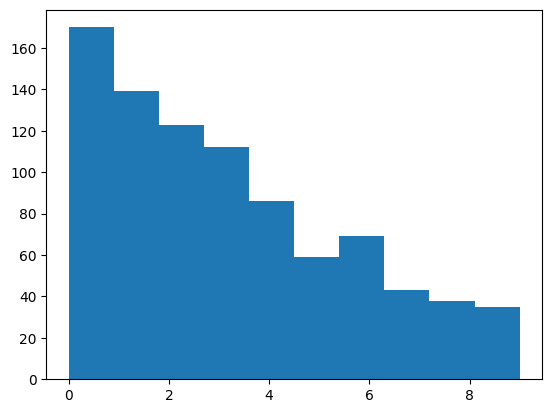

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
kb.fit(start_s.values.reshape(-1, 1))
start_s_dis = kb.transform(start_s.values.reshape(-1, 1))
data['start_s_dis'] = start_s_dis
plt.hist(start_s_dis, bins=10)
plt.show()

### Make train and test data
I use `train_test_split` to make train and test data, with 80% of data for training and 20% of data for testing.

In [11]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
print('Number of instances in train_data = %d' % (train_data.shape[0]))
print('Number of instances in test_data = %d' % (test_data.shape[0]))

Number of instances in train_data = 699
Number of instances in test_data = 175
